In [46]:
# importing packages
import pandas as pd
import numpy as np
import json
import seaborn as sns; sns.set() # has to be installed
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
# FIRST BEST RUN HYPERPARAMETER SEARCH (based on F1_macro and f1 hate)

In [82]:
# loading the data into a dataframe
with open("exchange_base/Model_Results/Retraining_Best_Performing_Model_60_epochs/26_CNN_experiment_optimizer_Adam_lr_01_epochs_120_batchsize_16_samplerTclassweightsF_False_scheduler_True/all_results_of_model.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 
def numbers_to_arrays(row):
     predicted_epoch = row['predicted_epoch']
     labels_epoch = row['labels_epoch']
     row['predicted_epoch_array'] = list(map(int, predicted_epoch.split(" ")))
     row['labels_epoch_array'] = list(map(int, labels_epoch.split(" ")))
     return row 
df = df.apply(numbers_to_arrays, axis=1)

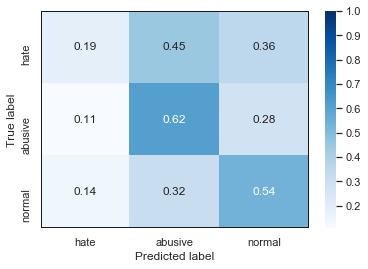

In [86]:
# Plotting Confusion Matrix
# specify epoch
epoch = 0
df = df[df.stage == 'validation']
labels = df[df.epoch == epoch].labels_epoch_array.values[0]
predicted = df[df.epoch == epoch].predicted_epoch_array.values[0]
confusion_matrix = metrics.confusion_matrix(labels, predicted, normalize='true')
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'
ax = sns.heatmap(df_cm, cmap=plt.cm.Blues, annot=True, vmax=1.0, xticklabels=['hate', 'abusive', 'normal'], yticklabels=['hate', 'abusive', 'normal'])
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=df_cm.shape[1], color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=df_cm.shape[0], color='k',linewidth=2)

In [66]:
# creating dataframe from epochs in json file
with open("exchange_base/Model_Results/Retraining_Best_Performing_Model_60_epochs/26_CNN_experiment_optimizer_Adam_lr_01_epochs_60_batchsize_16_samplerTclassweightsF_False_scheduler_True/all_results_of_model.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 

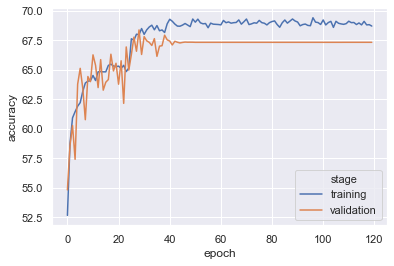

In [73]:
# plotting accuracy
ax = sns.lineplot(x="epoch", y="accuracy", hue="stage", data=df)

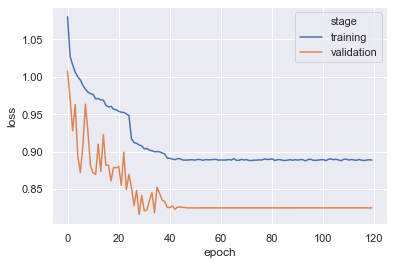

In [74]:
# plotting loss
ax = sns.lineplot(x="epoch", y="loss", hue="stage", data=df)

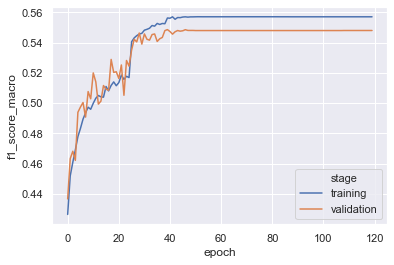

In [75]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="f1_score_macro", hue="stage", data=df)

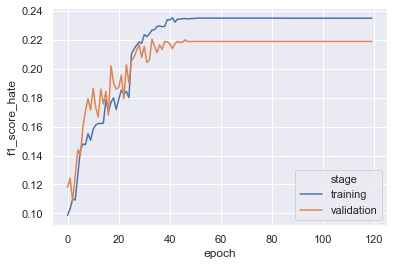

In [76]:
# plotting f1_score hate
ax = sns.lineplot(x="epoch", y="f1_score_hate", hue="stage", data=df)

In [41]:
df = df[df.stage == 'validation']
classification_report_str = df[df.epoch == 29].classification_report_str.values

In [42]:
print('|'+ classification_report_str[0], sep=" ")

|              precision    recall  f1-score   support

           0       0.22      0.25      0.23       966
           1       0.70      0.61      0.65      6969
           2       0.72      0.78      0.75      8678

    accuracy                           0.68     16613
   macro avg       0.55      0.55      0.54     16613
weighted avg       0.68      0.68      0.68     16613



In [28]:
#FIRST BEST RUN BASED ON ACCURACY

In [14]:
# creating dataframe from epochs in json file
with open("exchange_base/Model_Results/FirstGridSearch/14_CNN_experiment_optimizer_Adam_lr_001_epochs_30_batchsize_16_samplerTclassweightsF_False_scheduler_True/all_results_of_model.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 

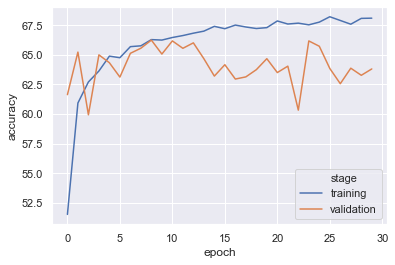

In [15]:
# plotting accuracy
ax = sns.lineplot(x="epoch", y="accuracy", hue="stage", data=df)

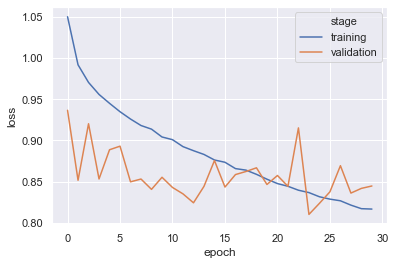

In [17]:
# plotting loss
ax = sns.lineplot(x="epoch", y="loss", hue="stage", data=df)

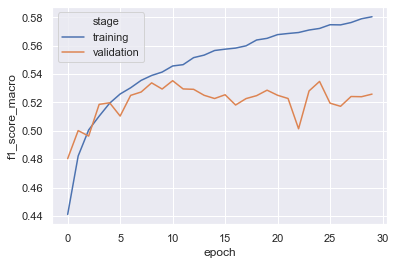

In [18]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="f1_score_macro", hue="stage", data=df)

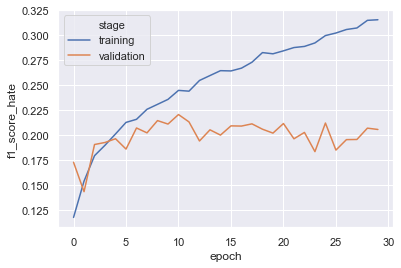

In [19]:
# plotting f1 score hate
ax = sns.lineplot(x="epoch", y="f1_score_hate", hue="stage", data=df)